/tmp/ipython-input-2-1789291875.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


✅ Model Accuracy (R² Score): 0.75


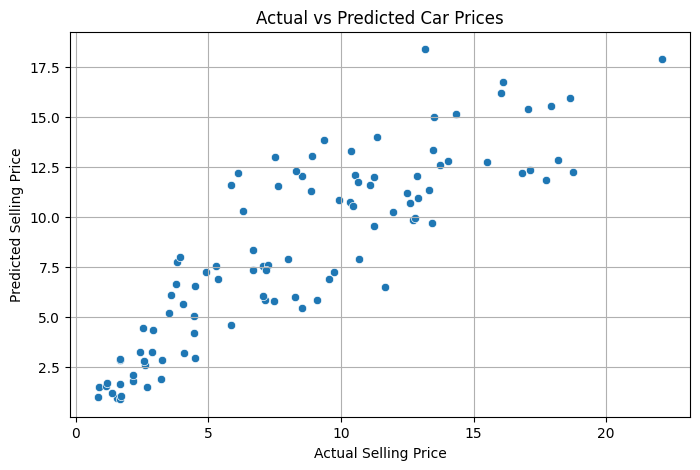

In [2]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ✅ Step 2: Generate Sample Car Dataset
np.random.seed(42)
n = 500
df = pd.DataFrame({
    "Present_Price": np.round(np.random.uniform(2, 30, n), 2),
    "Kms_Driven": np.random.randint(1000, 200000, n),
    "Fuel_Type": np.random.choice(['Petrol', 'Diesel', 'CNG'], n),
    "Seller_Type": np.random.choice(['Dealer', 'Individual'], n),
    "Transmission": np.random.choice(['Manual', 'Automatic'], n),
    "Owner": np.random.choice([0, 1, 2], n),
    "Year": np.random.choice(range(2000, 2021), n)
})

# ✅ Step 3: Add Age & Selling Price Columns
df["Car_Age"] = 2020 - df["Year"]
df["Selling_Price"] = np.round(df["Present_Price"] * np.random.uniform(0.3, 0.8, n), 2)
df.drop("Year", axis=1, inplace=True)

# ✅ Step 4: Convert Categorical to Numerical
df.replace({
    'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2},
    'Seller_Type': {'Dealer': 0, 'Individual': 1},
    'Transmission': {'Manual': 0, 'Automatic': 1}
}, inplace=True)

# ✅ Step 5: Define Features & Target
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

# ✅ Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# ✅ Step 7: Train the Model
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ✅ Step 8: Model Accuracy
score = r2_score(y_test, y_pred)
print(f"✅ Model Accuracy (R² Score): {score:.2f}")

# ✅ Step 9: Visualize Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()
